In [1]:
pip install adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 8.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.1/257.1 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats
from adjustText import adjust_text
import matplotlib.ticker as ticker
from sklearn.metrics import root_mean_squared_error

In [87]:
from sklearn.linear_model import LinearRegression

In [101]:
df[df["Model"]!="qwen-14b"]

,Model,Loss,GSM8K,MATH,SAT-Math,MMLU-Math,Average on Mathematical Reasoning
0,codellama-13b,1.101911,0.197877,0.051718,0.377273,0.386645,0.253378
1,codellama-34b,1.049879,0.319181,0.067175,0.400000,0.417908,0.301066
2,codellama-7b,1.140862,0.146323,0.032268,0.272727,0.359919,0.202809
3,deepseek-llm-67b-base,0.958564,0.560273,0.106860,0.540909,0.501348,0.427347
4,deepseek-llm-7b-base,1.107207,0.172100,0.039595,0.318182,0.378424,0.227075
5,deepseek-math-7b,0.953792,0.592115,0.215344,0.600000,0.505107,0.478142
6,falcon-40b,1.084313,0.230478,0.036493,0.318182,0.430274,0.253857
7,llama1-13b,1.093348,0.136467,0.036064,0.286364,0.389504,0.212100
8,llama1-30b,1.027220,0.320697,0.057621,0.363636,0.448748,0.297676
9,llama1-65b,1.009217,0.425322,0.079913,0.418182,0.453351,0.344192


In [458]:
file_path ='Files/plot2.xlsx'
df = pd.read_excel(
    file_path,
    sheet_name="Math")
df=df[df["Model"]!="qwen-7b"]
df=df[df["Model"]!="qwen-14b"]
df=df[df["Model"]!="qwen-72b"]
df=df[df["Model"]!="codellama-7b"]
df=df[df["Model"]!="codellama-13b"]
df=df[df["Model"]!="codellama-34b"]
x=df["ar-bpc"]
# x=df[["ar-bpc"]]
# x = df[['Bits per character']]
# x=df['Bits per character']
# x=df[['Average bpc']]
for title in ["Average on Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math", "MMLU-Math"]:
# for title in ["Average"]:
# for title in ["Average Score"]:
# for title in ["Average on Coding", "HumanEval", "Mbpp", "DS-1000"]:
# for title in ["Average on Knowledge and Commonsense Reasoning", "Hellaswag", "TQA", "MMLU","NQ","ARC-challenge(acc_norm)"]:
    y = df[title]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'{title} rho: {r_value}\n')
    # model = LinearRegression()
    # model.fit(x, y)
    # y_pred = model.predict(x)
    # mse = root_mean_squared_error(list(y),y_pred)
    # print(f'{title} Mean Squared Error: {mse}\n')

Average on Mathematical Reasoning rho: -0.9510263345267943

GSM8K rho: -0.9194911951037881

MATH rho: -0.8818991648766625

SAT-Math rho: -0.9289008861061177

MMLU-Math rho: -0.909098684608813



In [7]:
def draw_subplot(i, ax, models, x, y, colors, title="Subplot", xlabel='', ylabel='', outliers=None, model_map=None, ylim=None, xlim=None):
    # linear regression computation is common for all
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    y_pred = slope * x + intercept
    rmse = root_mean_squared_error(y, y_pred)

    min_x = np.min(x)
    max_x = np.max(x)
    space = abs(min_x-max_x)*0.1

    x_line = np.linspace(min_x-space, max_x+space, 100)
    y_line = slope * x_line + intercept

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=1)

    ax.plot(x_line, y_line, color=colors[1], linewidth=3 if i else 6, alpha=1, label=rf"$\rho$: {r_value:.3f}"+"\n"+f"e: {rmse:.3f}", zorder=2)
    ax.scatter(x, y, color=colors[0], s=50 if i else 120, zorder=3)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if i == 0:  # Adjust text only in the main plot
        texts = []
        for model, xi, yi in zip(models, x, y):
            for mm in model_map:
                if mm in model:
                    texts.append(ax.text(xi, yi, model, ha='right', va='bottom', fontsize=16))
        adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5), ax=ax)

    if outliers:  # Plot isolated points in red, only for the main plot
        isolated_x = outliers[0]
        isolated_y = outliers[1]
        ax.scatter(isolated_x, isolated_y, color=colors[2], s=50 if i else 120, marker='D', label='Outlier', zorder=4)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=16)

    if i!=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        legend_handles = [Patch(facecolor='none', edgecolor='none', label=rf"$\rho$: {r_value:.3f}"+"\n"+f"e: {rmse:.3f}")]
        ax.legend(handles=legend_handles, handlelength=0, handletextpad=0,fontsize=14)
    else:
        ax.legend(fontsize=20)
    return ax

In [466]:
def draw_multiplot(models, xs, ys, title, subtitles, colors = ['#005A3E', '#169D53', '#E84430'], file_name="multiplot_figure_vertical.pdf", xlabel="Bits per character", ylabel="Accuracy", ysublabels=None, outliers=None, model_map=None, ylim=None):
    fig=plt.figure(figsize=(16, 8))

    # Main subplot on the left using subplot2grid
    ax_main = plt.subplot2grid((9, 11), (0, 0), rowspan=9, colspan=8)
    axs_right = [plt.subplot2grid((9, 11), (i*3, 8), rowspan=3, colspan=3) for i in range(3)]  # 3 small subplots on the right

    # An array to hold all axes for easy configuration
    all_axes = [ax_main] + axs_right

    for i, ax in enumerate(all_axes):
        if i<3:
            ax = draw_subplot(i, ax, models if type(models[0])==str else models[i], 
                            xs if type(xs[0])!=pd.core.series.Series else xs[i], ys[i], 
                            colors if type(colors[0])==str else colors[i], 
                            subtitles[i], '', ysublabels[i] if ysublabels else '', 
                            outliers, model_map, ylim)#[i] if type(ylim)==list else ylim)
        else:
            ax = draw_subplot_except(i, ax, models if type(models[0])==str else models[i], 
                          xs if type(xs[0])!=pd.core.series.Series else xs[i], ys[i], 
                          colors if type(colors[0])==str else colors[i], 
                          subtitles[i], '', ysublabels[i] if ysublabels else '', 
                          [[],[]], model_map, ylim)

    # plt.suptitle(title, fontsize=26)
    plt.tight_layout()
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.08, right=0.9)  # Experiment with these values
    fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=20)
    fig.text(0.04, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=20)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')  # Vector format
    plt.show()

In [5]:
model_map=["llama2", "deepseek", "llama1", "Mixtral", "Yi"] #"mistral","qwen",
colors = [['#005A3E', '#169D53', '#E84430'],
          ['#b9243a', '#e6b8c2', '#E84430'],
          ['#178fa6', '#79c1c6', '#E84430'],
          ['#ea6444', '#ffc103', '#E84430']]
file_path = 'Files/plot2.xlsx'

## Code

In [2]:
def clean_models(models):
    for i in range(len(models)):
        s=models[i]
        models[i]=s[0].upper() + s[1:].lower()
        s=models[i]
        if "Llama1" in s:
            s="Llama-1"+s.split("Llama1")[1]
        if "Llama2" in s:
            s="Llama-2"+s.split("Llama2")[1]
        if "base" in s:
            s=s.split("-base")[0]
        if "v0.1" in s:
            s=s.split("-v0.1")[0]
        models[i]=s
    return(models)
clean_models(models)

NameError: name 'models' is not defined

In [198]:
import re

s = "Deepseek-coder-1.3b"
# The pattern looks for any series of characters that don't include a dash (-) followed by digits.
# It stops capturing once it encounters a dash (-) followed by any number.
match = re.search(r"^(.*?)-\d", s)

if match:
    result = match.group(1)
    print(result)
else:
    print("Pattern not found")

Deepseek-coder


/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

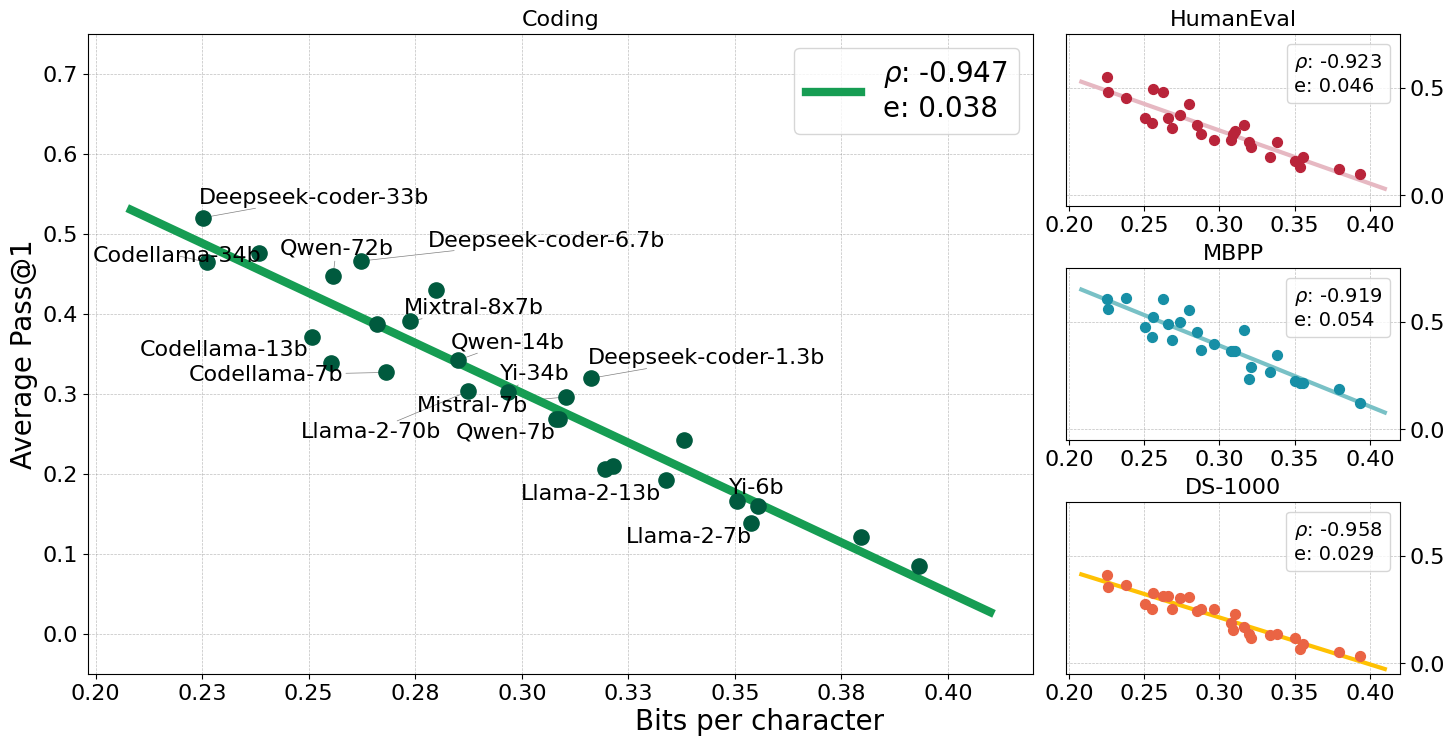

In [354]:
model_map=["Llama-2", "Qwen","Deepseek-coder", "Mixtral", "Yi", "Mistral","Codellama"]

data = pd.read_excel(file_path,sheet_name="Python")
titles=["Average on Coding", "HumanEval", "Mbpp", "DS-1000"]

# 提取 x 和 y 的值
models = data['Model']
models=clean_models(models)
x = data['Bits per character']
ys=[]
for title in titles:
    ys.append(data[title])

ylim=(-0.05,0.75)

draw_multiplot(models, x, ys, colors=colors, title="", ylabel="Average Pass@1", subtitles=["Coding", "HumanEval", "MBPP", "DS-1000"], 
               model_map=model_map, file_name="Figs/code.pdf",ylim=ylim)

## Overview

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

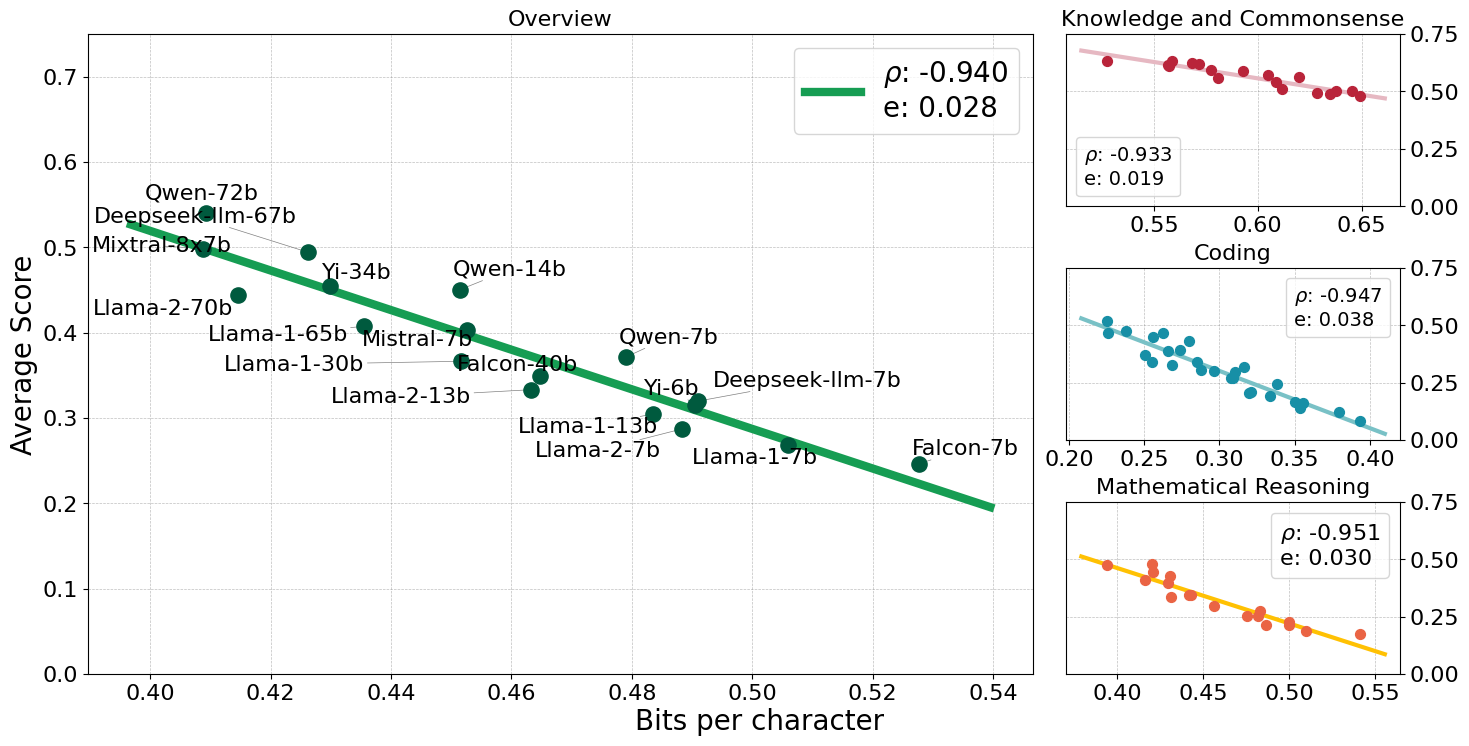

In [468]:
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Yi", "Mistral","Codellama","Falcon"]

sheets=["Overview", "General", "Python", "Math"]
df = pd.read_excel(file_path, sheet_name=sheets)
average=["Average", "Average on Knowledge and Commonsense Reasoning", "Average on Coding", "Average on Mathematical Reasoning"]

xs, ys, models=[], [], []

for sheet, avg in zip(sheets, average):
    data = df[sheet]
    submodels=data['Model']
    submodels=clean_models(submodels)
    models.append(submodels)
    xs.append(data['Bits per character' if sheet!="Math" else "ar-bpc"])
    ys.append(data[avg])

# print(models)

ylim=[0,0.75]

draw_multiplot(models, xs, ys, colors=colors, title="", xlabel="Bits per character", ylabel="Average Score", 
               subtitles=["Overview", "Knowledge and Commonsense", "Coding", "Mathematical Reasoning"], 
               model_map=model_map, file_name="Figs/overview_0.pdf", ylim=ylim)

In [115]:
def draw_plot(models, x, ys, title, subtitles, file_name="multiplot_figure_vertical.pdf", xlabel="Bits per character", ylabel="Accuracy", outliers=None, model_map=None):
    color, e_color = '#005A3E', '#E84430'

    fig=plt.figure(figsize=(12, 8))

    # Main subplot on the left using subplot2grid
    ax_main = plt.subplot2grid((9, 8), (0, 0), rowspan=9, colspan=8)
    # axs_right = [plt.subplot2grid((9, 11), (i*3, 8), rowspan=3, colspan=3) for i in range(3)]  # 3 small subplots on the right

    # An array to hold all axes for easy configuration
    all_axes = [ax_main] #+ axs_right

    for i, ax in enumerate(all_axes):
        ax = draw_subplot(i, ax, models, x, ys[i], color, e_color, subtitles[i], '', '', outliers, model_map)

    plt.suptitle(title, fontsize=26)
    plt.tight_layout()
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)  # Experiment with these values
    fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=24)
    fig.text(0.04, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=24)
    plt.savefig(file_name, format='pdf')  # Vector format
    plt.show()

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

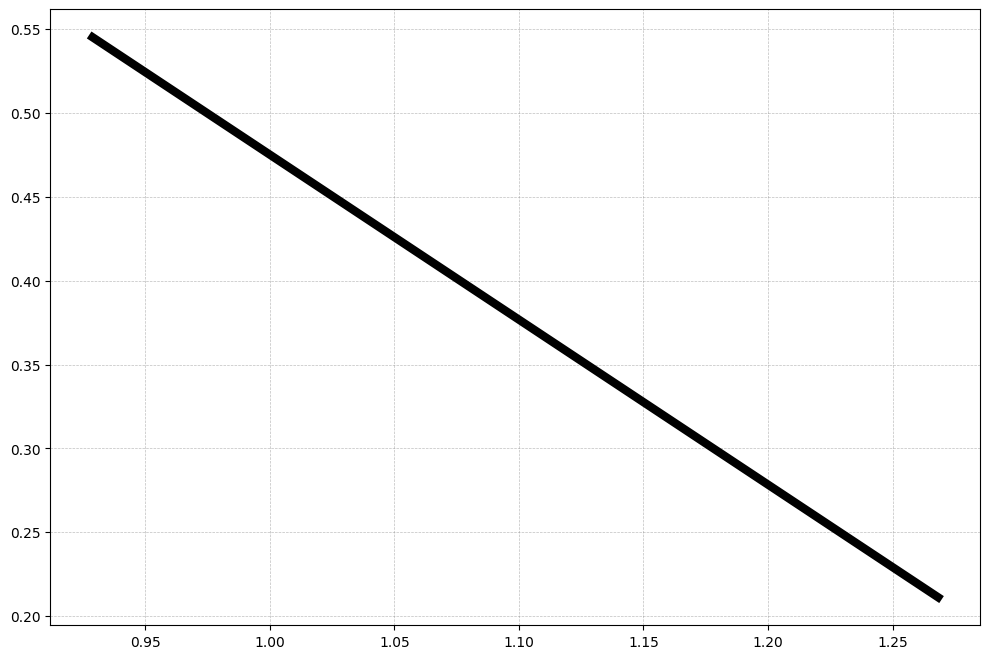

In [116]:
model_map=["llama2", "qwen","deepseek", "llama1", "mixtral", "Mixtral"]
# 读取上传的Excel文件
file_path = 'Files/plot1.xlsx'
data = pd.read_excel(file_path,sheet_name="Overview")
titles=["Average Score"]#, "GSM8K", "SAT-Math", "MMLU-Math"]

# 提取 x 和 y 的值
models = data['Model']
x = data['Average Bits per character']
ys=[]
for title in titles:
    ys.append(data[title])

# outliers=[[0.9278845876],[0.555386032]]
# print(models)
draw_plot(models, x, ys, title="Overview", xlabel="Average Bits per character", ylabel="Average Score", subtitles=[""],
               model_map=model_map, file_name="figs_for_ct/overview.pdf")

## General

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

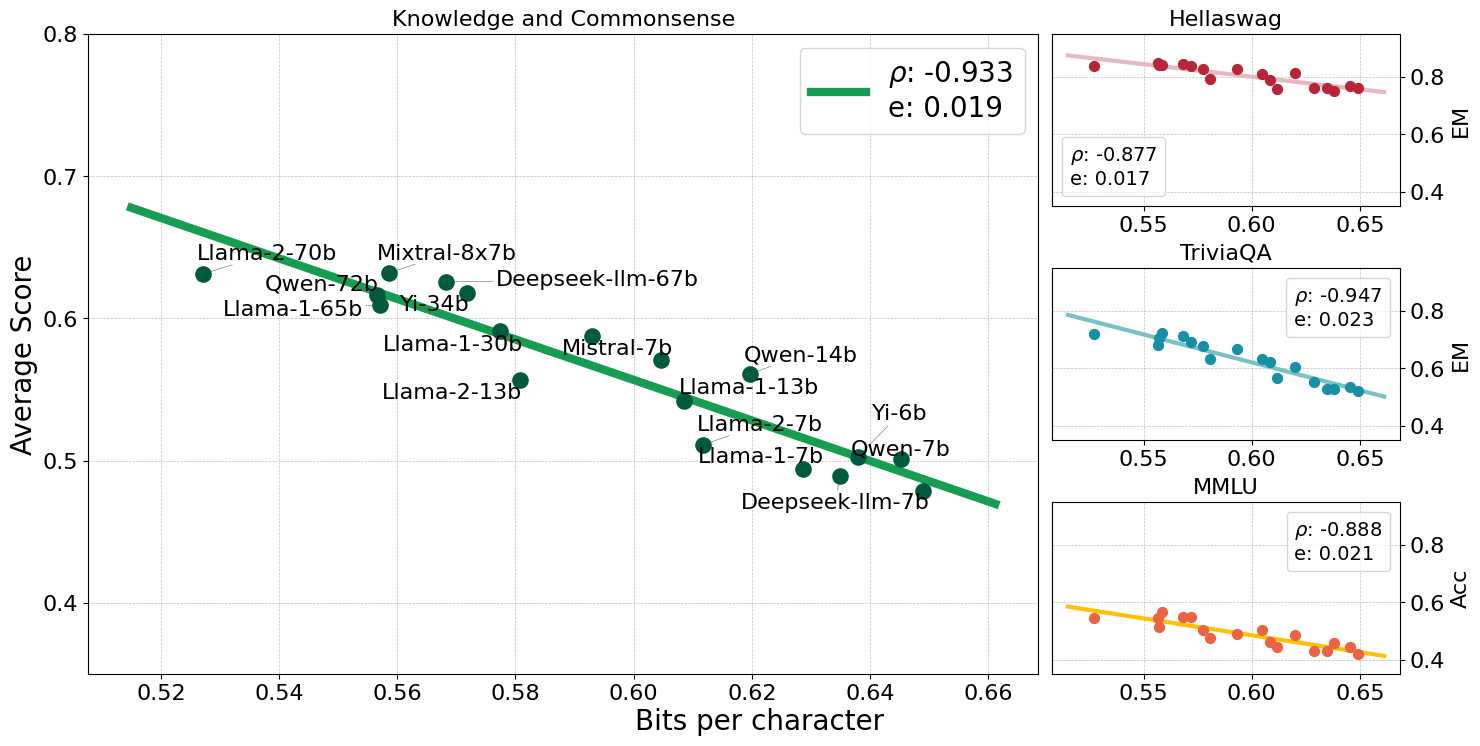

In [356]:
model_map=["Llama-2", "Qwen","Deepseek", "Mixtral", "Yi", "Mistral","Llama-1"]

data = pd.read_excel(file_path,sheet_name="General")
titles=["Average on Knowledge and Commonsense Reasoning", "Hellaswag", "TQA", "MMLU"]

# 提取 x 和 y 的值
models = data['Model']
models=clean_models(models)
x = data['Bits per character']
ys=[]
for title in titles:
    ys.append(data[title])

ylim=[(0.35,0.8),(0.35,0.95),(0.35,0.95),(0.35,0.95)]

draw_multiplot(models, x, ys, colors=colors, title="", ylabel="Average Score", 
               subtitles=["Knowledge and Commonsense", "Hellaswag", "TriviaQA", "MMLU"],
               ysublabels=["", "EM", "EM", "Acc"],
               model_map=model_map, file_name="Figs/general.pdf",
               ylim=ylim)

## Math

In [8]:
def draw_subplot_except(i, ax, models, x, y, colors, title="Subplot", xlabel='', ylabel='', outliers=None, model_map=None, ylim=None):
    # except qwen
    x_o, y_o=x,y
    for model, xi, yi in zip(models, x_o, y_o):
        if "Qwen" in model:
            outliers[0].append(xi)
            outliers[1].append(yi)
            indices_to_remove = x[x == xi].index
            x = x.drop(indices_to_remove)
            y = y.drop(indices_to_remove)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    y_pred = slope * x + intercept
    rmse = root_mean_squared_error(y, y_pred)

    min_x = np.min(x)
    max_x = np.max(x)
    space = abs(min_x-max_x)*0.1

    x_line = np.linspace(min_x-space, max_x+space, 100)
    y_line = slope * x_line + intercept

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=1)

    ax.plot(x_line, y_line, color=colors[1], linewidth=3 if i else 6, alpha=1, label=rf"$\rho$: {r_value:.3f}"+"\n"+f"e: {rmse:.3f}", zorder=2)
    ax.scatter(x, y, color=colors[0], s=50 if i else 120, zorder=3)

    ax.set_ylim(ylim)

    # linear regression computation is common for all
    if i == 0:  # Adjust text only in the main plot
        texts = []
        for model, xi, yi in zip(models, x_o, y_o):
            if model.split("-")[0] in model_map:
                texts.append(ax.text(xi, yi, model, ha='right', va='bottom', fontsize=16))
        adjust_text(texts, x_o, y_o, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5), ax=ax)

    if outliers:  # Plot isolated points in red, only for the main plot
        isolated_x = outliers[0]
        isolated_y = outliers[1]
        # ax.scatter(isolated_x, isolated_y, color=colors[2], s=50 if i else 120, marker='D', label='Outlier', zorder=4)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=16)

    if i!=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        legend_handles = [Patch(facecolor='none', edgecolor='none', label=rf"$\rho$: {r_value:.3f}"+"\n"+f"e: {rmse:.3f}")]
        ax.legend(handles=legend_handles, handlelength=0, handletextpad=0,fontsize=16)
    else:
        ax.legend(fontsize=20)
    return ax

In [452]:
def draw_multiplot_except(models, xs, ys, title, subtitles, colors = ['#005A3E', '#169D53', '#E84430'], file_name="multiplot_figure_vertical.pdf", xlabel="Bits per character", ylabel="Accuracy", ysublabels=None, outliers=None, model_map=None, ylim=None):
    fig=plt.figure(figsize=(16, 8))

    # Main subplot on the left using subplot2grid
    ax_main = plt.subplot2grid((9, 11), (0, 0), rowspan=9, colspan=8)
    axs_right = [plt.subplot2grid((9, 11), (i*3, 8), rowspan=3, colspan=3) for i in range(3)]  # 3 small subplots on the right

    # An array to hold all axes for easy configuration
    all_axes = [ax_main] + axs_right
    if type(colors[0])==str:
        colors = [colors]*len(all_axes)

    for i, ax in enumerate(all_axes):
        ax = draw_subplot_except(i, ax, models if type(models[0])==str else models[i], 
                          xs if type(xs[0])!=pd.core.series.Series else xs[i], ys[i], 
                          colors if type(colors[0])==str else colors[i], 
                          subtitles[i], '', ysublabels[i] if ysublabels else '', 
                          [[],[]], model_map, ylim)

    # plt.suptitle(title, fontsize=26)
    plt.tight_layout()
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.08, right=0.9)  # Experiment with these values
    fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=20)
    fig.text(0.04, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=20)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')  # Vector format
    plt.show()

In [183]:
# models[2]="Codellama-7b"
for i in range(len(models)):
    s=models[i]
    models[i]=s[0].upper() + s[1:]
    s=models[i]
    if "Llama1" in s:
        s="Llama-1"+s.split("Llama1")[1]
    if "Llama2" in s:
        s="Llama-2"+s.split("Llama2")[1]
    if "base" in s:
        s=s.split("-base")[0]
    models[i]=s
models

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/744807619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:]
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/744807619.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/744807619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0]

0        Codellama-13b
1        Codellama-34b
2         Codellama-7b
3     Deepseek-llm-67b
4      Deepseek-llm-7b
5     Deepseek-math-7b
6           Falcon-40b
7          Llama-1-13b
8          Llama-1-30b
9          Llama-1-65b
10          Llama-1-7b
11         Llama-2-13b
12         Llama-2-70b
13          Llama-2-7b
14          Llemma-34b
15           Llemma-7b
16          Mistral-7b
17        Mixtral-8x7b
18            Qwen-14b
19            Qwen-72b
20             Qwen-7b
21              Yi-34B
22               Yi-6B
Name: Model, dtype: object

In [233]:
data = pd.read_excel(file_path,sheet_name="Math")
titles=["Average on Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math"]#"MMLU-Math"]

indices_to_drop = data[data['Model'] == 'codellama-7b'].index
data = data.drop(indices_to_drop)
indices_to_drop = data[data['Model'] == 'codellama-13b'].index
data = data.drop(indices_to_drop)
indices_to_drop = data[data['Model'] == 'codellama-34b'].index
data = data.drop(indices_to_drop)
data.reset_index(drop=True, inplace=True)
data

,Model,Bits per character,Average on Mathematical Reasoning,GSM8K,MATH,SAT-Math,MMLU-Math
0,deepseek-llm-67b-base,0.485912,0.427347,0.560273,0.106860,0.540909,0.501348
1,deepseek-llm-7b-base,0.561374,0.227075,0.172100,0.039595,0.318182,0.378424
2,deepseek-math-7b,0.483260,0.478142,0.592115,0.215344,0.600000,0.505107
3,falcon-40b,0.549728,0.253857,0.230478,0.036493,0.318182,0.430274
4,llama1-13b,0.554260,0.212100,0.136467,0.036064,0.286364,0.389504
5,llama1-30b,0.520710,0.297676,0.320697,0.057621,0.363636,0.448748
6,llama1-65b,0.511452,0.344192,0.425322,0.079913,0.418182,0.453351
7,llama1-7b,0.587329,0.189186,0.106899,0.025623,0.263636,0.360585
8,llama2-13b,0.551107,0.250927,0.219105,0.042497,0.313636,0.428471
9,llama2-70b,0.492939,0.398129,0.504170,0.099182,0.509091,0.480073


/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

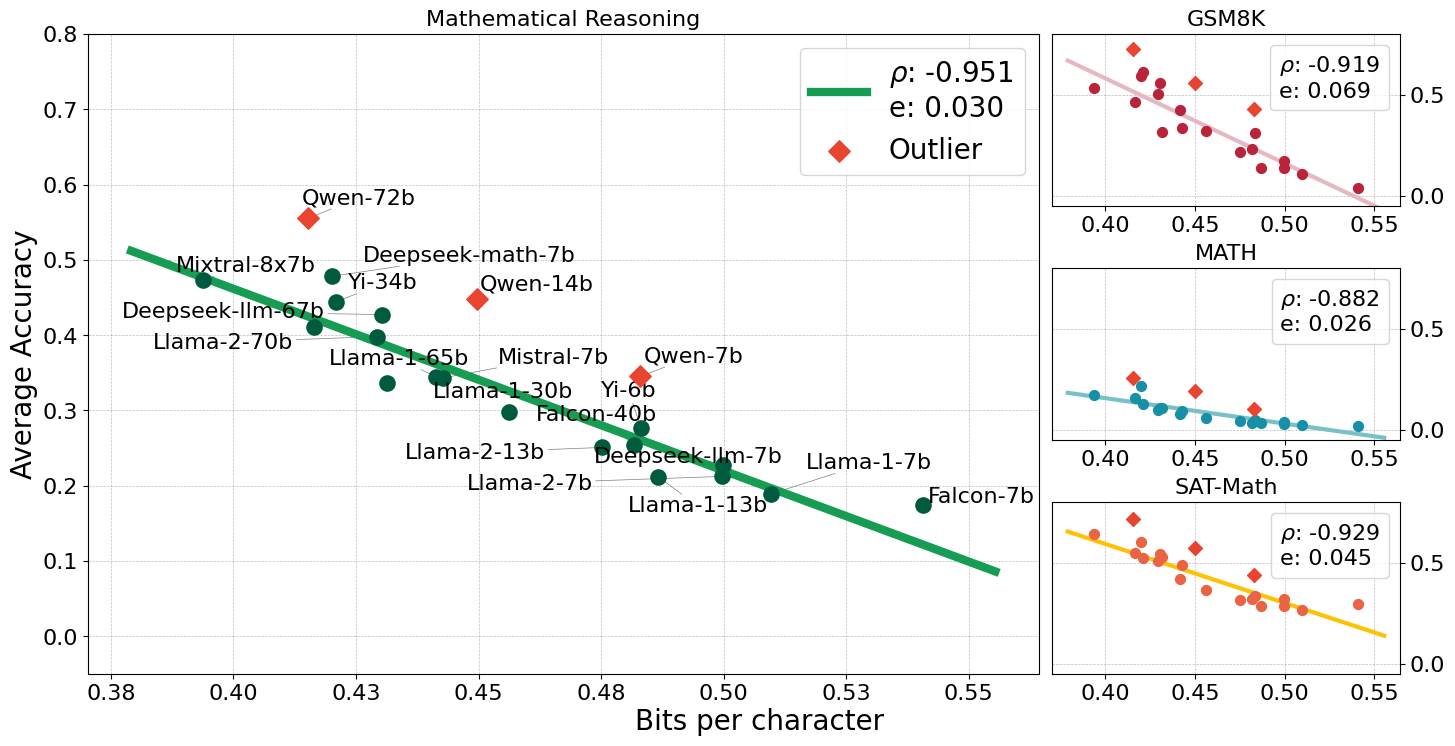

In [453]:
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Yi", "Mistral","Codellama","Falcon"]

data = pd.read_excel(file_path,sheet_name="Math")
titles=["Average on Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math"]#"MMLU-Math"]

indices_to_drop = data[data['Model'] == 'codellama-7b'].index
data = data.drop(indices_to_drop)
indices_to_drop = data[data['Model'] == 'codellama-13b'].index
data = data.drop(indices_to_drop)
indices_to_drop = data[data['Model'] == 'codellama-34b'].index
data = data.drop(indices_to_drop)
data.reset_index(drop=True, inplace=True)

# 提取 x 和 y 的值
models = data['Model']
models=clean_models(models)
x = data['ar-bpc']
ys=[]
for title in titles:
    ys.append(data[title])

# outliers=[[0.9278845876,0.973899922,1.048255813],
#           [0.555386032,0.448335451,0.345165091]]

ylim=(-0.05, 0.8)
# print(models)
draw_multiplot_except(models, x, ys, colors=colors, title="Mathematical Reasoning", 
            ylabel="Average Accuracy", subtitles=["Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math"],
            model_map=model_map, file_name="Figs/math.pdf",
            ylim=ylim)

In [374]:
def draw_multiplot_except4(models, xs, ys, title, subtitles, colors = ['#005A3E', '#169D53', '#E84430'], file_name="multiplot_figure_vertical.pdf", xlabel="Bits per character", ylabel="Accuracy", ysublabels=None, outliers=None, model_map=None, ylim=None):
    fig=plt.figure(figsize=(16, 8))

    # Main subplot on the left using subplot2grid
    ax_main = plt.subplot2grid((8, 12), (0, 0), rowspan=8, colspan=6)
    axs_right = [plt.subplot2grid((8, 12), (i*4, 6), rowspan=4, colspan=3) for i in range(2)]
    axs_right_r = [plt.subplot2grid((8, 12), (i*4, 9), rowspan=4, colspan=3) for i in range(2)]

    # An array to hold all axes for easy configuration
    all_axes = [ax_main] + axs_right + axs_right_r
    if type(colors[0])==str:
        colors = [colors]*len(all_axes)

    for i, ax in enumerate(all_axes):
        ax = draw_subplot_except(i, ax, models if type(models[0])==str else models[i], 
                          xs if type(xs[0])!=pd.core.series.Series else xs[i], ys[i], 
                          colors if type(colors[0])==str else colors[i], 
                          subtitles[i], '', ysublabels[i] if ysublabels else '', 
                          [[],[]], model_map, ylim)

    # plt.suptitle(title, fontsize=26)
    plt.tight_layout()
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.08, right=0.9)  # Experiment with these values
    fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=20)
    fig.text(0.04, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=20)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')  # Vector format
    plt.show()

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

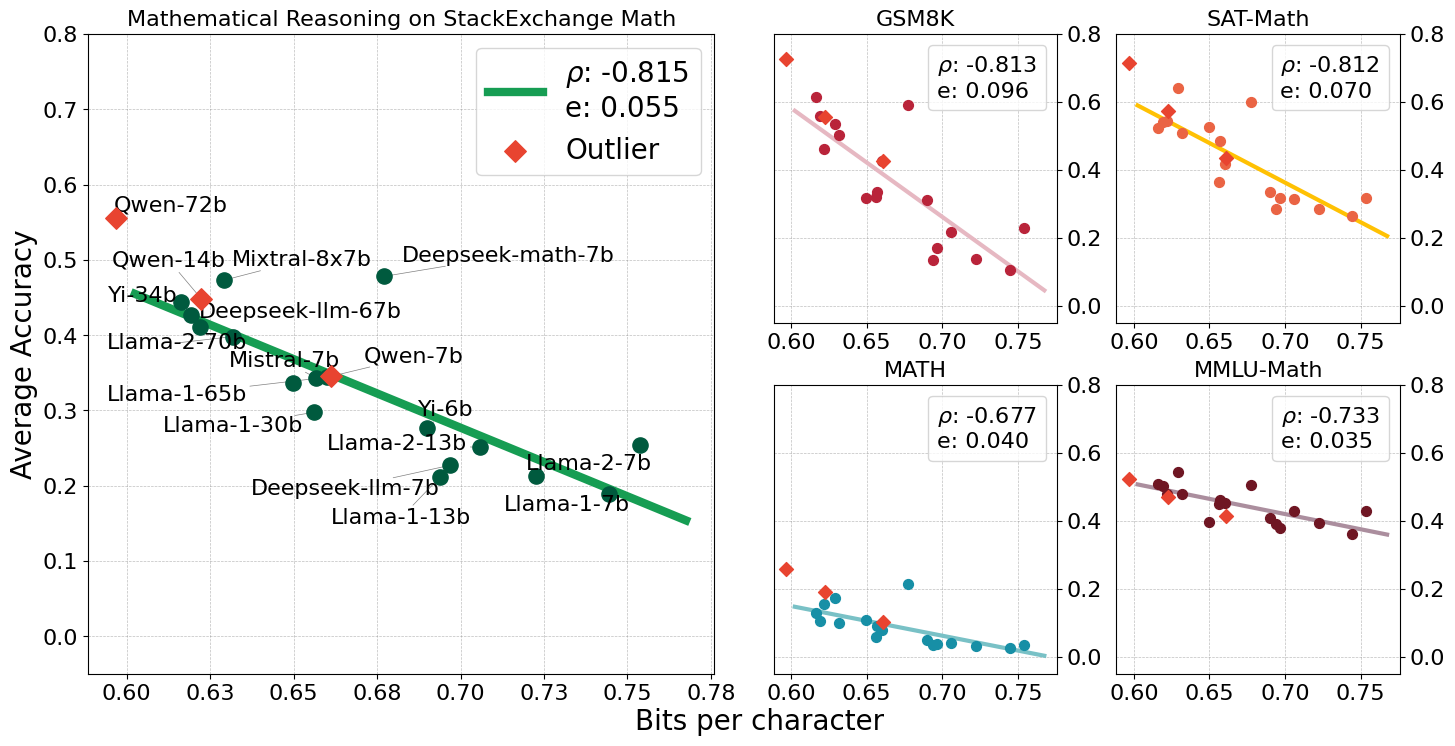

In [375]:
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Yi", "Mistral","Codellama"]

data = pd.read_excel(file_path,sheet_name="Math")
titles=["Average on Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math", "MMLU-Math"]

# 提取 x 和 y 的值
models = data['Model']
models=clean_models(models)
x = data['se-bpc']
ys=[]
for title in titles:
    ys.append(data[title])

colors = [['#005A3E', '#169D53', '#E84430'],
          ['#b9243a', '#e6b8c2', '#E84430'],
          ['#178fa6', '#79c1c6', '#E84430'],
          ['#ea6444', '#ffc103', '#E84430'],
          ["#6f1623", "#ab8e9e", '#E84430'],]

ylim=(-0.05, 0.8)
# print(models)
draw_multiplot_except4(models, x, ys, colors=colors, title="Mathematical Reasoning", 
            ylabel="Average Accuracy", subtitles=["Mathematical Reasoning on StackExchange Math", "GSM8K", "MATH", "SAT-Math","MMLU-Math"],
            model_map=model_map, file_name="Figs/math_se.pdf",
            ylim=ylim)

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

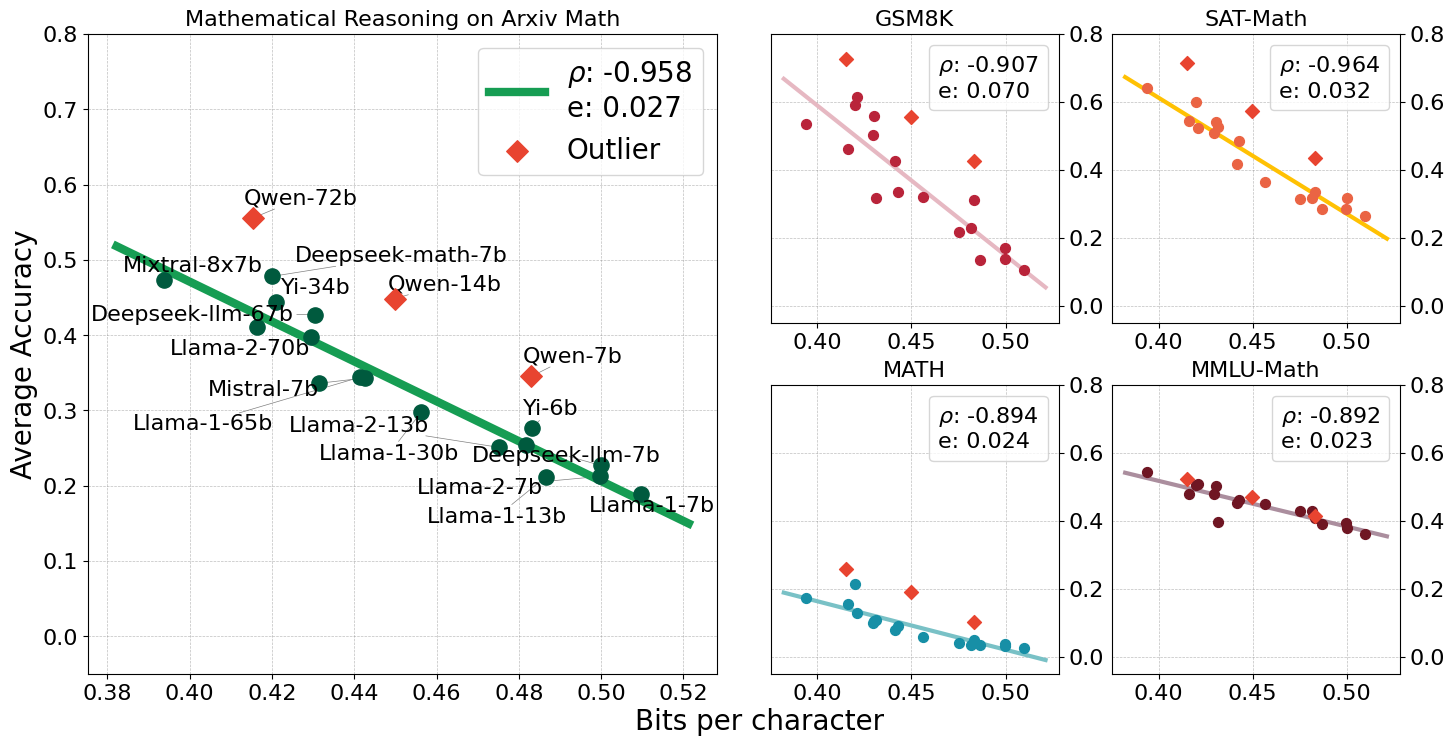

In [376]:
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Yi", "Mistral","Codellama"]

data = pd.read_excel(file_path,sheet_name="Math")
titles=["Average on Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math", "MMLU-Math"]

# 提取 x 和 y 的值
models = data['Model']
models=clean_models(models)
x = data['ar-bpc']
ys=[]
for title in titles:
    ys.append(data[title])

colors = [['#005A3E', '#169D53', '#E84430'],
          ['#b9243a', '#e6b8c2', '#E84430'],
          ['#178fa6', '#79c1c6', '#E84430'],
          ['#ea6444', '#ffc103', '#E84430'],
          ["#6f1623", "#ab8e9e", '#E84430'],]

ylim=(-0.05, 0.8)
# print(models)
draw_multiplot_except4(models, x, ys, colors=colors, title="Mathematical Reasoning", 
            ylabel="Average Accuracy", subtitles=["Mathematical Reasoning on Arxiv Math", "GSM8K", "MATH", "SAT-Math","MMLU-Math"],
            model_map=model_map, file_name="Figs/math_ar.pdf",
            ylim=ylim)

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

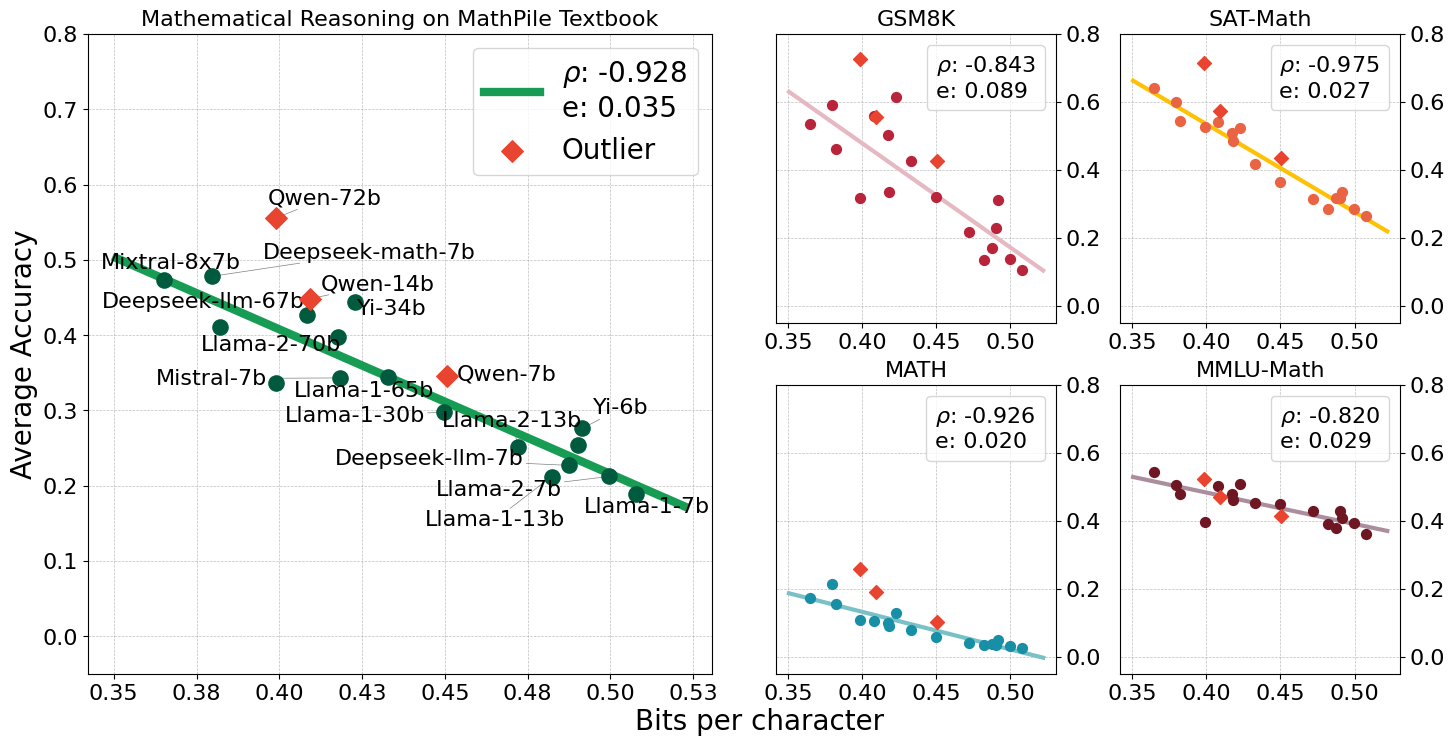

In [377]:
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Yi", "Mistral","Codellama"]

data = pd.read_excel(file_path,sheet_name="Math")
titles=["Average on Mathematical Reasoning", "GSM8K", "MATH", "SAT-Math", "MMLU-Math"]

# 提取 x 和 y 的值
models = data['Model']
models=clean_models(models)
x = data['mt-bpc']
ys=[]
for title in titles:
    ys.append(data[title])

colors = [['#005A3E', '#169D53', '#E84430'],
          ['#b9243a', '#e6b8c2', '#E84430'],
          ['#178fa6', '#79c1c6', '#E84430'],
          ['#ea6444', '#ffc103', '#E84430'],
          ["#6f1623", "#ab8e9e", '#E84430'],]

ylim=(-0.05, 0.8)
# print(models)
draw_multiplot_except4(models, x, ys, colors=colors, title="Mathematical Reasoning", 
            ylabel="Average Accuracy", subtitles=["Mathematical Reasoning on MathPile Textbook", "GSM8K", "MATH", "SAT-Math","MMLU-Math"],
            model_map=model_map, file_name="Figs/math_mt.pdf",
            ylim=ylim)

# Mismatch

In [475]:
def draw_subplot_larger(i, ax, models, x, y, colors, title="Subplot", xlabel='', ylabel='', outliers=None, model_map=None, ylim=None, fontsize=16):
    # except qwen
    x_o, y_o=x,y
    for model, xi, yi in zip(models, x_o, y_o):
        if "Qwen" in model:
            outliers[0].append(xi)
            outliers[1].append(yi)
            indices_to_remove = x[x == xi].index
            x = x.drop(indices_to_remove)
            y = y.drop(indices_to_remove)

    # linear regression computation is common for all
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    y_pred = slope * x + intercept
    rmse = root_mean_squared_error(y, y_pred)

    min_x = np.min(x)
    max_x = np.max(x)
    space = abs(min_x-max_x)*0.1

    x_line = np.linspace(min_x-space, max_x+space, 100)
    y_line = slope * x_line + intercept

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=1)

    ax.plot(x_line, y_line, color=colors[1], linewidth=3 if i else 8, alpha=1, label=rf"$\rho$: {r_value:.3f}"+"\n"+f"e: {rmse:.3f}", zorder=2)
    ax.scatter(x, y, color=colors[0], s=50 if i else 280, zorder=3)

    ax.set_ylim(ylim)

    if i == 0:  # Adjust text only in the main plot
        texts = []
        for model, xi, yi in zip(models, x, y):
            for mm in model_map:
                if mm in model:
                    texts.append(ax.text(xi, yi, model, ha='right', va='bottom', fontsize=fontsize))
        adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5), ax=ax)

    if outliers:  # Plot isolated points in red, only for the main plot
        isolated_x = outliers[0]
        isolated_y = outliers[1]
        # ax.scatter(isolated_x, isolated_y, color=colors[2], s=50 if i else 120, marker='D', label='Outlier', zorder=4)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

    if i!=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        legend_handles = [Patch(facecolor='none', edgecolor='none', label=rf"$\rho$: {r_value:.3f}"+"\n"+f"e: {rmse:.3f}")]
        ax.legend(handles=legend_handles, handlelength=0, handletextpad=0,fontsize=14)
    else:
        ax.legend(fontsize=fontsize)
    return ax

In [478]:
# model_map=["llama2", "deepseek", "Mixtral","mistral","llama1"] 

def draw(file_name, figsize=(10,10), ylim=None, colors=["#008759", '#E84430', '#E84430'],model_map=[],outliers=None):
    fig, ax = plt.subplots(figsize=figsize)
    i=0
    # ylim=(0.2,0.7)
    ax = draw_subplot_larger(i, ax, models if type(models[0])==str else models[i], 
                                xs if type(xs[0])!=pd.core.series.Series else xs[i], ys, 
                                colors=colors, title="",
                                # subtitles[i], '', ysublabels[i] if ysublabels else '', '#005A3E'
                                outliers=[[],[]], 
                                model_map=model_map,fontsize=40, ylim=ylim)

    plt.tight_layout()
    # plt.subplots_adjust(top=0.9)
    # plt.subplots_adjust(top=0.9, bottom=0.1, left=0.08, right=0.9)  # Experiment with these values
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=24)
    # fig.text(0.04, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=24)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')  # Vector format
    plt.show()

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

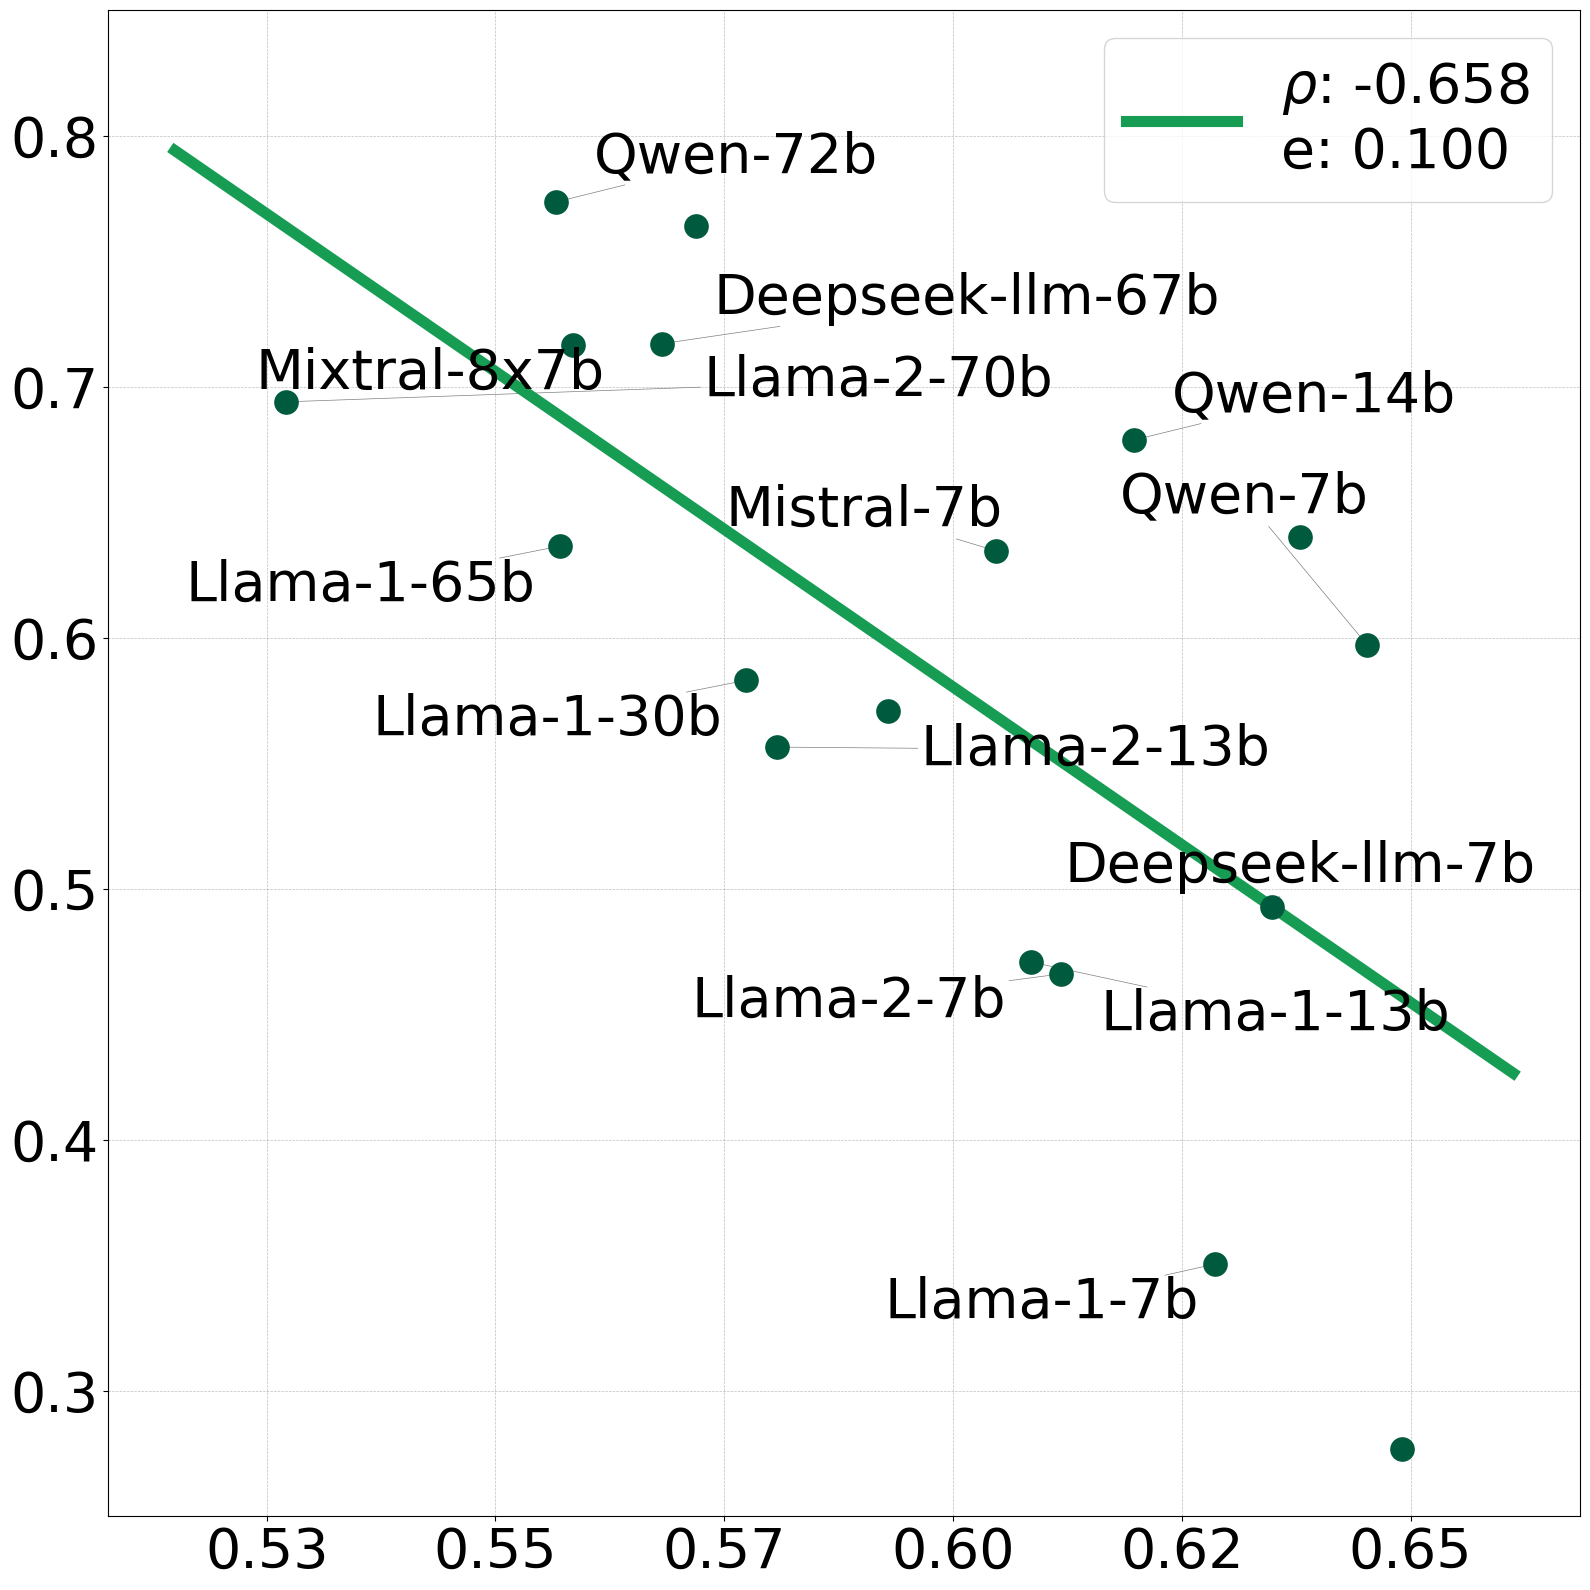

In [419]:
data = pd.read_excel("Files/plot3.xlsx",sheet_name="MMLU-default-style")
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Mistral","Codellama"]
models=data["model"]
models=clean_models(models)
xs=data["bpc"]
ys=data["Accuracy"]
# plt.figure(figsize=(12,8),)
draw("Figs/MMLU-default-style.pdf",figsize=(16,16),colors=['#005A3E', '#169D53', '#E84430'],model_map=model_map,ylim=(0.25,0.85))

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

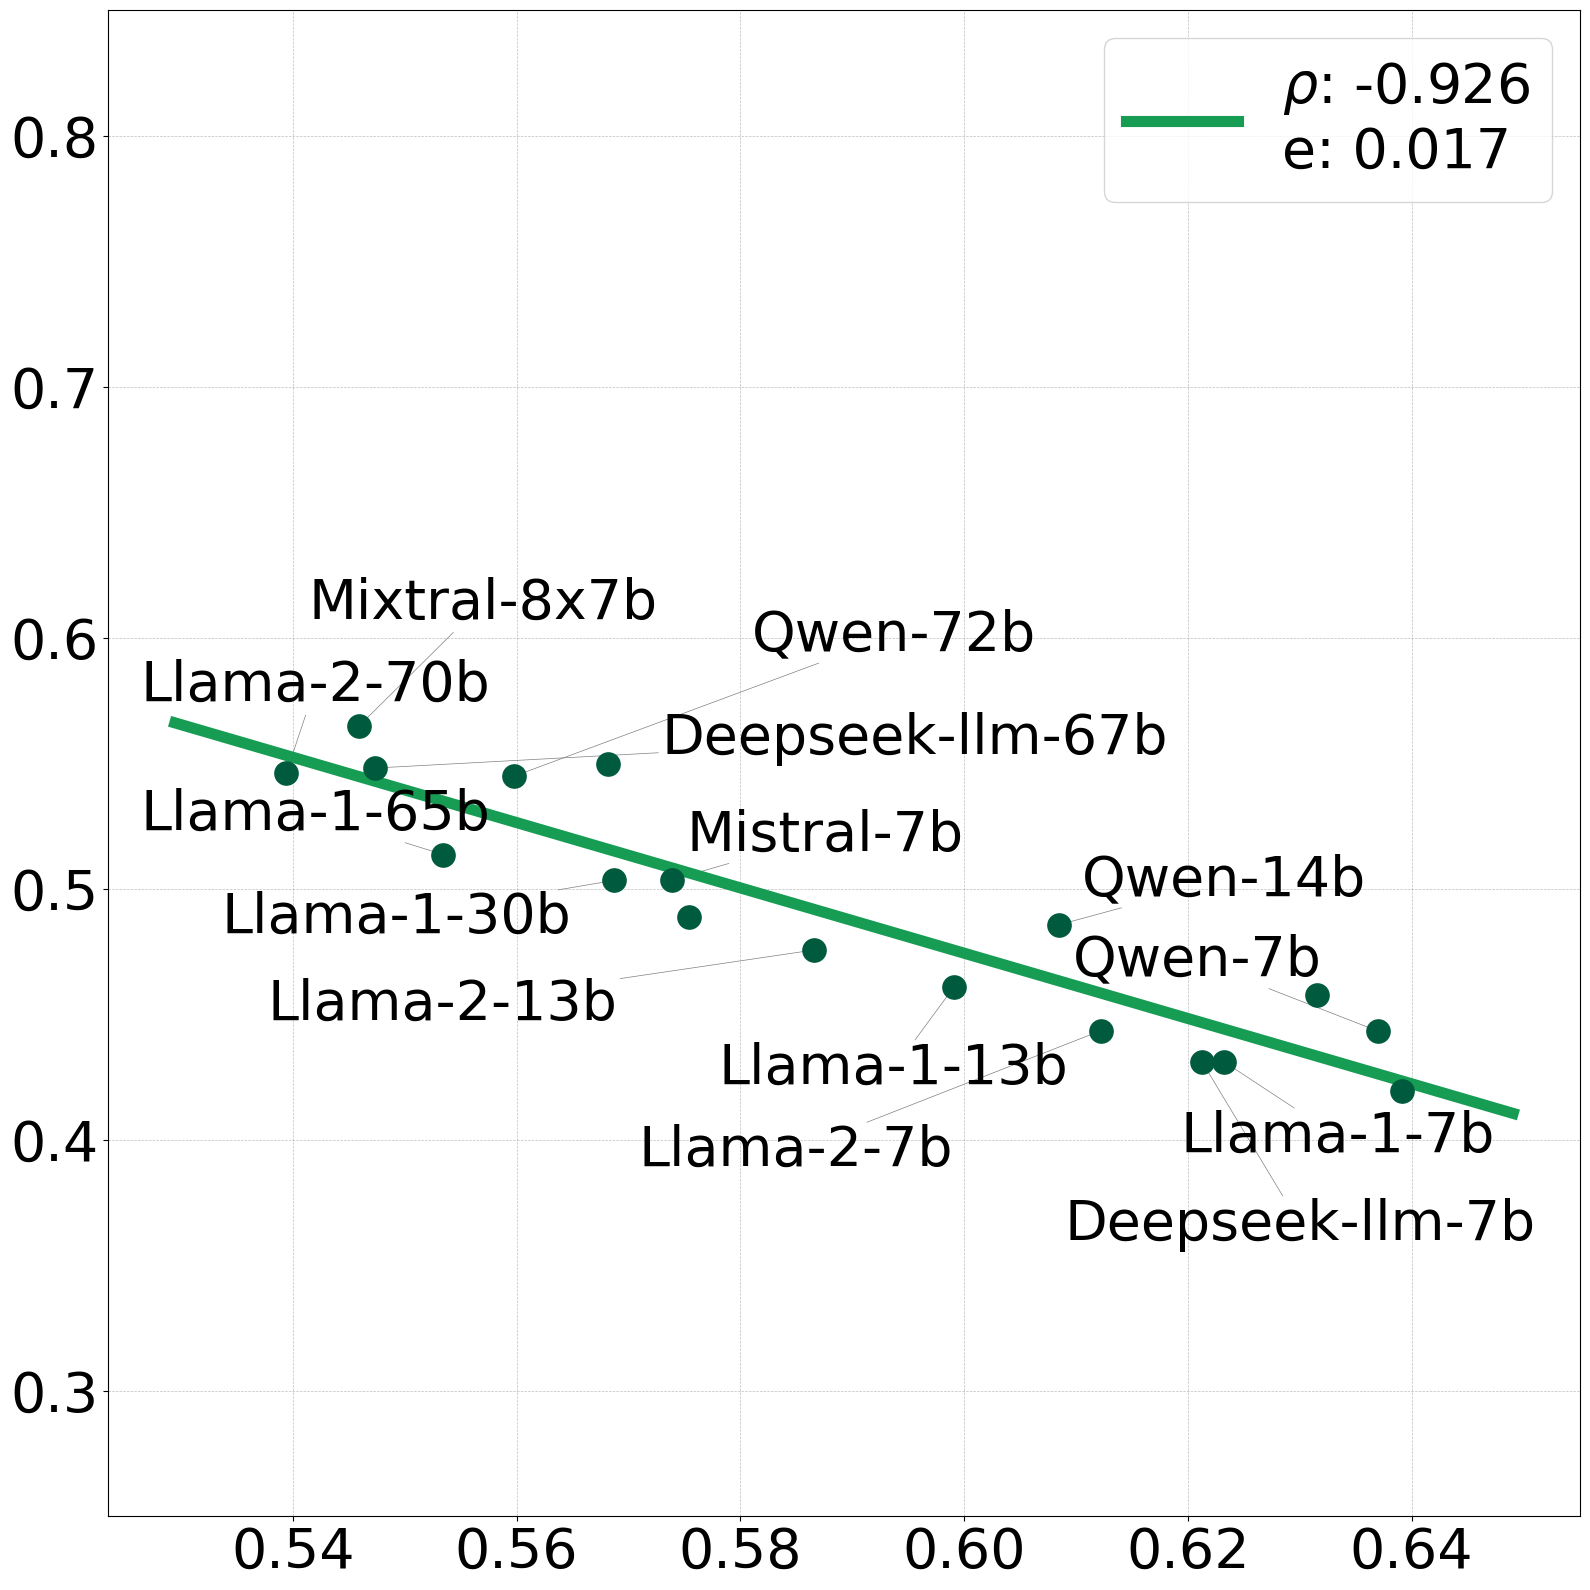

In [418]:
data = pd.read_excel("Files/plot2.xlsx",sheet_name="Analysis2-mmlu&textbook")
model_map=["Llama", "Qwen","Deepseek", "Mixtral", "Mistral","Codellama"]
models=data["model"]
models=clean_models(models)
xs=data["bpc"]
ys=data["Accuracy"]
# plt.figure(figsize=(12,8),)
draw("Figs/Analysis2-mmlu&textbook.pdf",figsize=(16,16),colors=['#005A3E', '#169D53', '#E84430'],model_map=model_map,ylim=(0.25,0.85))

# Real Mismatch

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

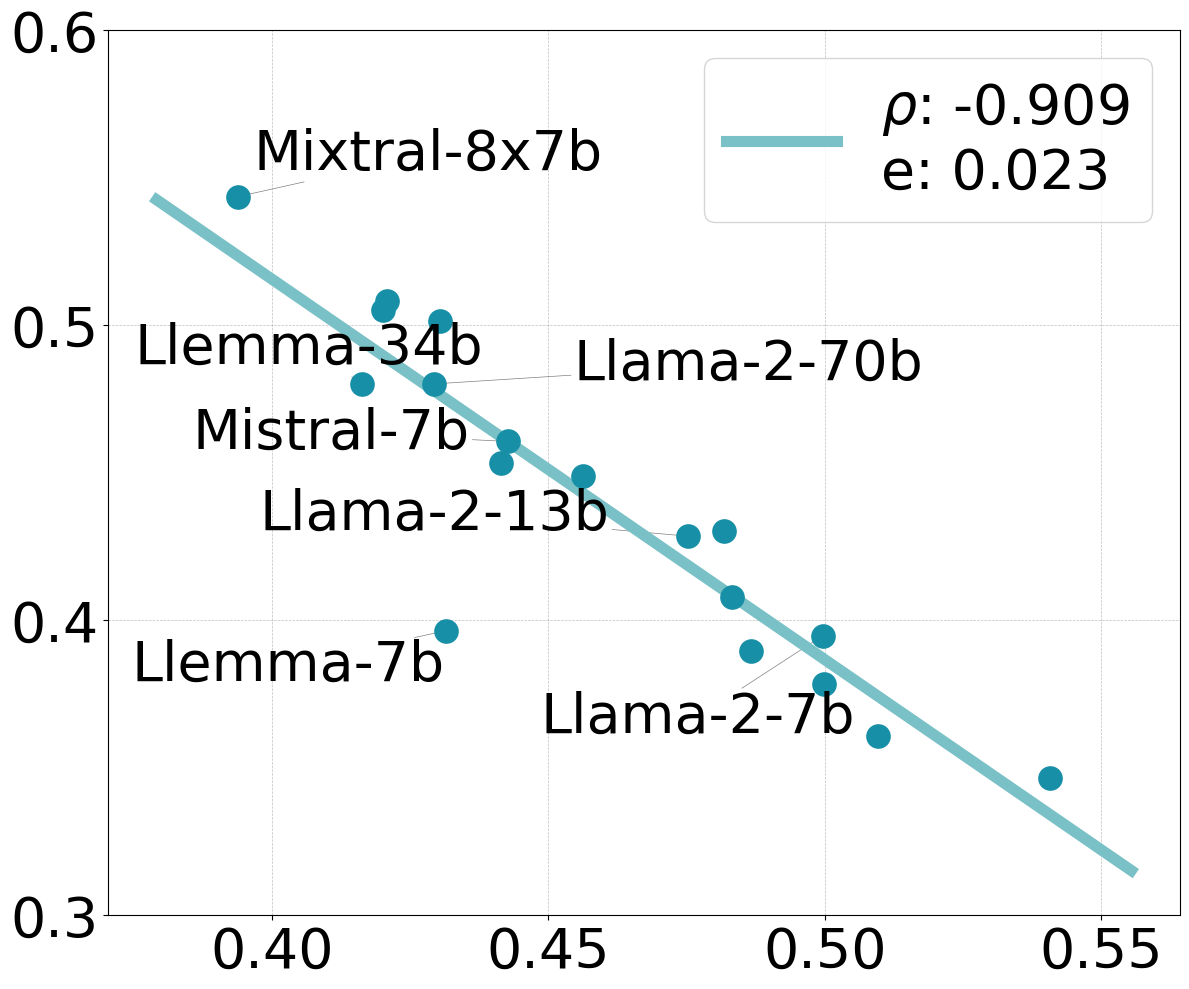

In [483]:
data = pd.read_excel(file_path,sheet_name="Math")
models=data["Model"]
models=clean_models(models)
xs=data["ar-bpc"]
ys=data["MMLU-Math"]
draw("Figs/math-mmlu.pdf", figsize=(12,10),ylim=(0.3,0.6),colors=colors[2],model_map=["Llama-2", "Llemma","Mi"])

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

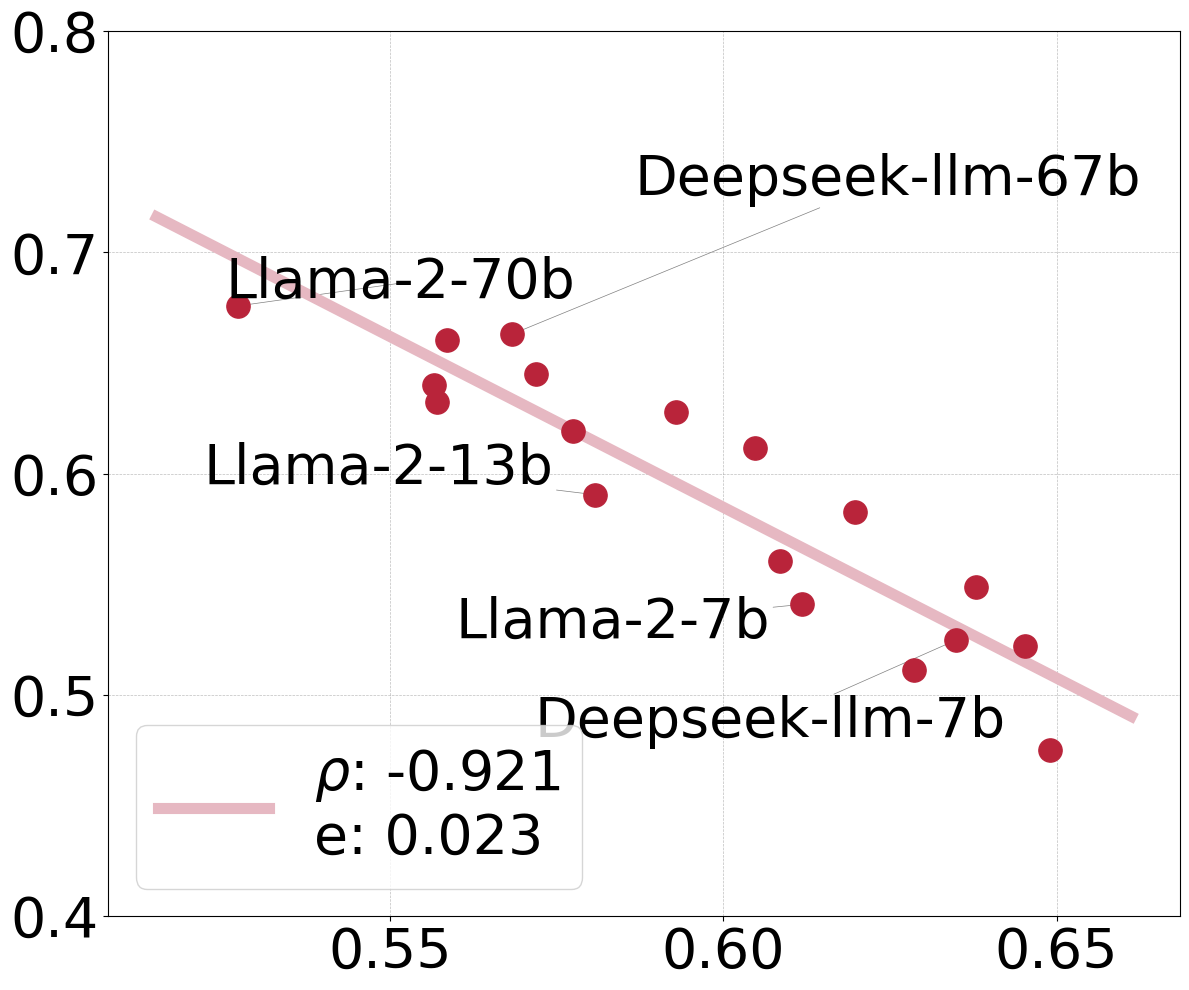

In [408]:
data = pd.read_excel(file_path,sheet_name="General")
models=data["Model"]
models=clean_models(models)
xs=data["Bits per character"]
ys=data["ARC-challenge(acc_norm)"]
draw("Figs/general-arc.pdf", figsize=(12,10),ylim=(0.4,0.8),colors=colors[1],model_map=["Llama-2", "Deepseek"])

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

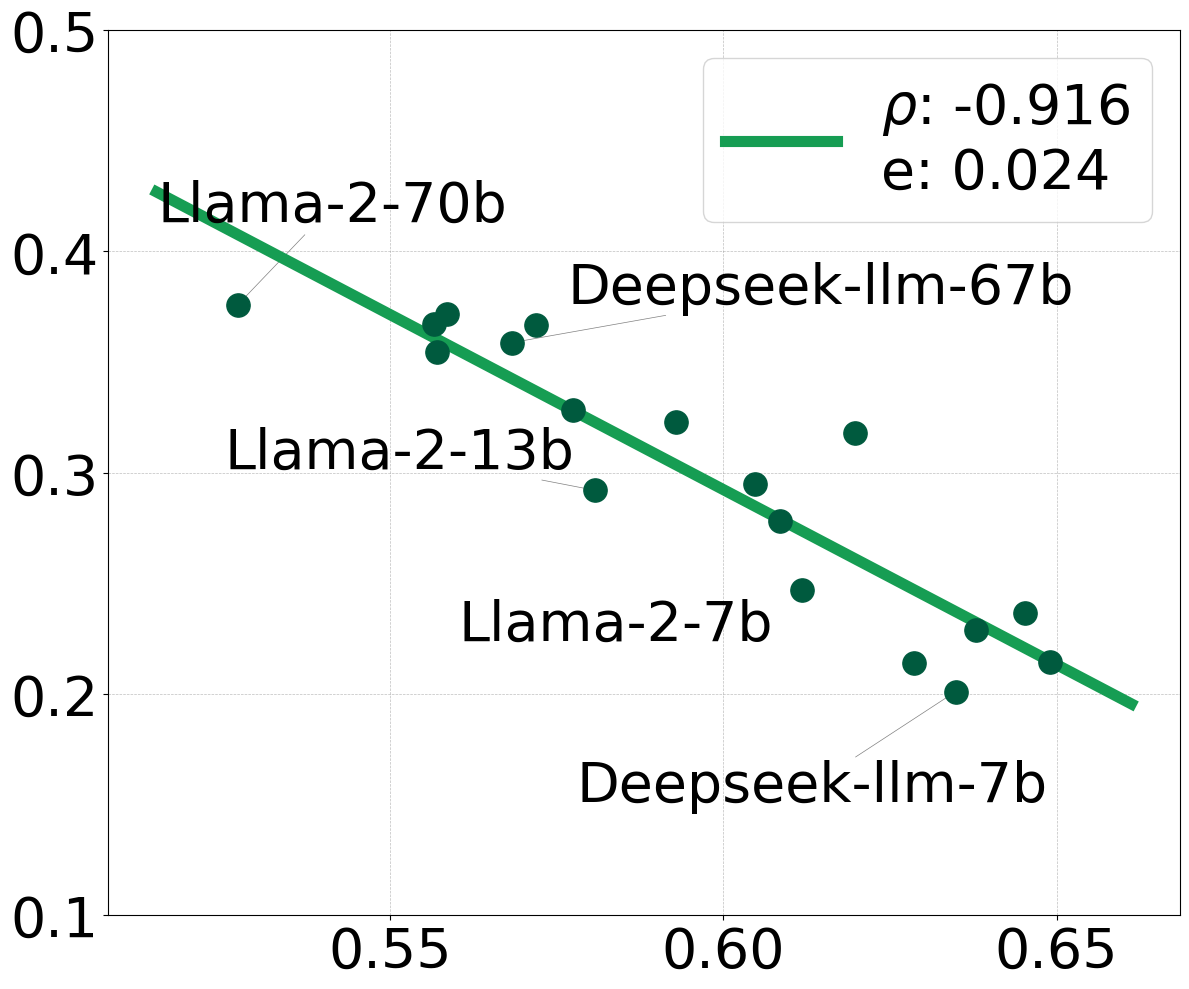

In [406]:
data = pd.read_excel(file_path,sheet_name="General")
models=data["Model"]
models=clean_models(models)
xs=data["Bits per character"]
ys=data["NQ"]
draw("Figs/general-nq.pdf", figsize=(12,10),ylim=(0.1,0.5),colors=colors[0],model_map=["Llama-2", "Deepseek"])

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

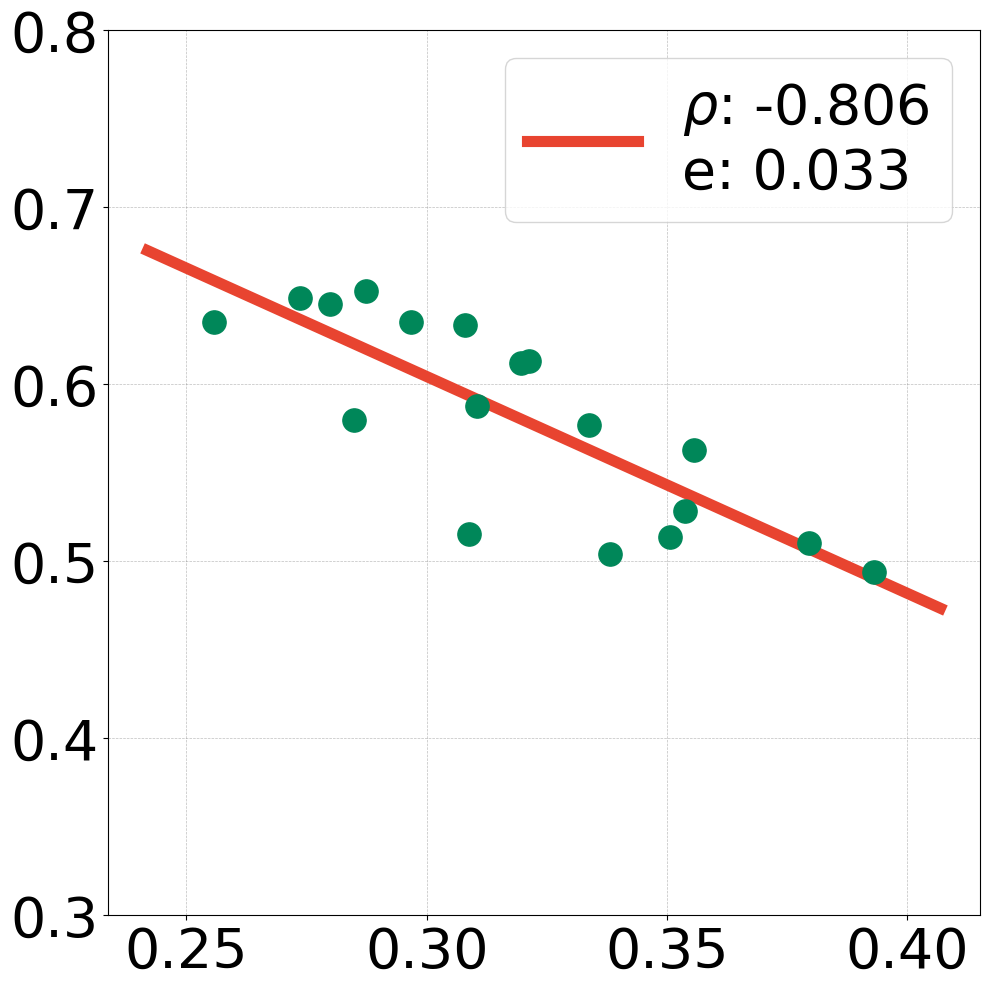

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_13363/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

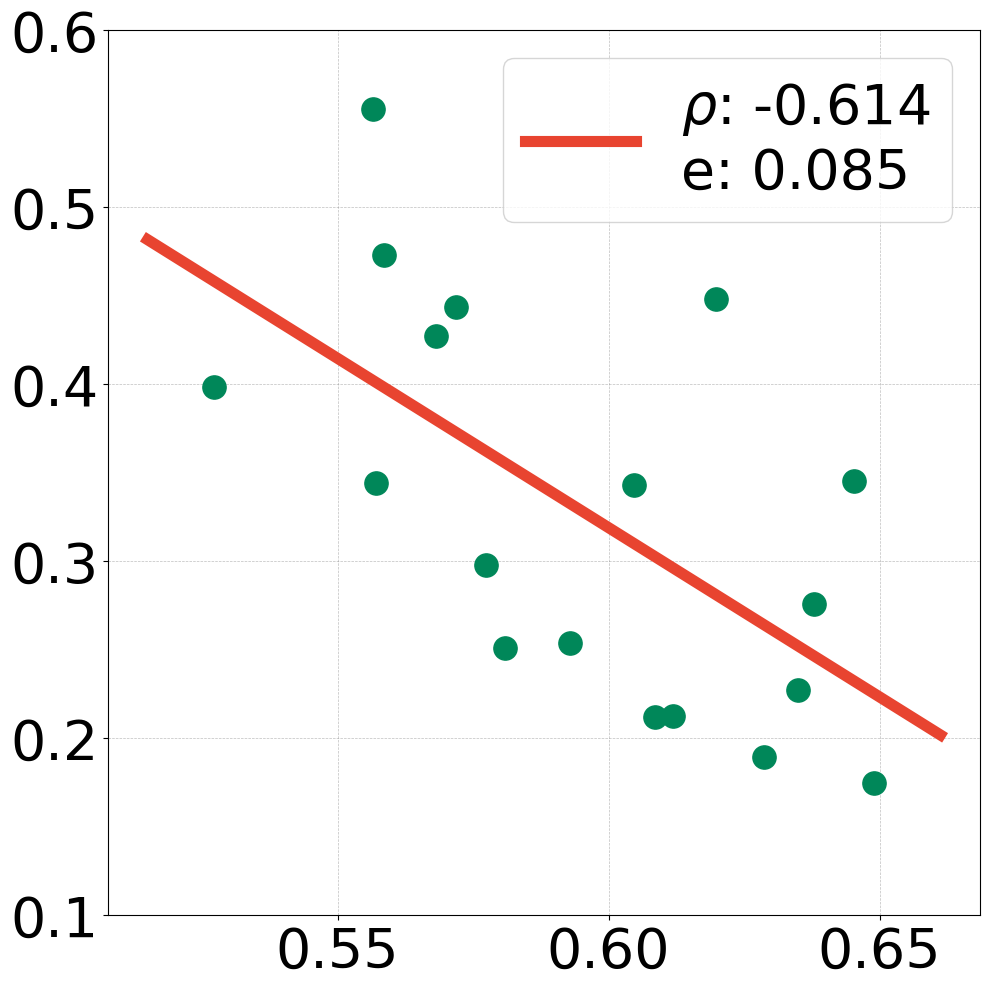

In [390]:
file_path="Files/plot2.xlsx"

data = pd.read_excel(file_path,sheet_name="Analysis1-pythonloss&general")
models=data["Model"]
models=clean_models(models)
xs=data["Python bpc"]
ys=data["Gneral-domain-Average"]
draw("Figs/Analysis1-pythonloss&general.pdf", ylim=(0.3,0.8))

data = pd.read_excel(file_path,sheet_name="Analysis1-ccloss&mathbench")
models=data["Model"]
models=clean_models(models)
xs=data["CC bpc"]
ys=data["Math-domain-Average"]
draw("Figs/Analysis1-ccloss&mathbench.pdf", ylim=(0.1,0.6))

# PAL

In [9]:
def draw_multiplot_pal(models, xs, ys, title, subtitles, colors = ['#005A3E', '#169D53', '#E84430'], file_name="multiplot_figure_vertical.pdf", xlabel="Bits per character", ylabel="Accuracy", ysublabels=None, outliers=None, model_map=None, ylim=None, xlim=None):
    fig=plt.figure(figsize=(16, 6))

    # Main subplot on the left using subplot2grid
    ax_main = plt.subplot2grid((8, 12), (0, 0), rowspan=8, colspan=8)
    axs_right = [plt.subplot2grid((8, 12), (i*4, 8), rowspan=4, colspan=4) for i in range(2)]  # 3 small subplots on the right

    # An array to hold all axes for easy configuration
    all_axes = [ax_main] + axs_right

    for i, ax in enumerate(all_axes):
        if i<3:
            ax = draw_subplot(i, ax, models if type(models[0])==str else models[i], 
                            xs if type(xs[0])!=pd.core.series.Series else xs[i], 
                            ys if type(ys[0])!=pd.core.series.Series else ys[i], 
                            colors if type(colors[0])==str else colors[i], 
                            subtitles[i], '', ysublabels[i] if ysublabels else '', 
                            outliers, model_map, ylim, xlim)
        else:
            ax = draw_subplot_except(i, ax, models if type(models[0])==str else models[i], 
                          xs if type(xs[0])!=pd.core.series.Series else xs[i], ys[i], 
                          colors if type(colors[0])==str else colors[i], 
                          subtitles[i], '', ysublabels[i] if ysublabels else '', 
                          [[],[]], model_map, ylim, xlim)

    # plt.suptitle(title, fontsize=26)
    plt.tight_layout()
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(top=0.9, bottom=0.12, left=0.08, right=0.9)  # Experiment with these values
    fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=20)
    fig.text(0.04, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=20)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')  # Vector format
    plt.show()

/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_19713/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s[0].upper() + s[1:].lower()
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_19713/480297831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models[i]=s
/var/folders/w_/904tkfxx62v_zgf7_1b5wqn40000gn/T/ipykernel_19713/480297831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models

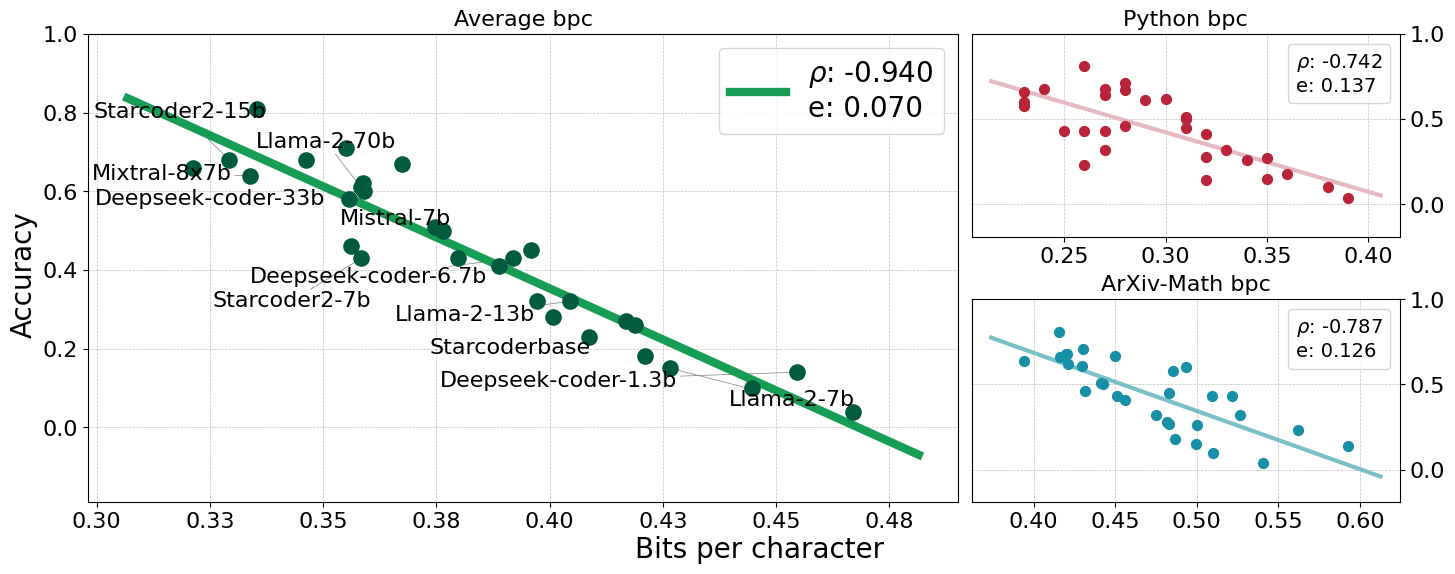

In [18]:
data = pd.read_excel("Files/plot6.xlsx",sheet_name="PAL-GSM8k")
model_map=["Llama-2","Deepseek-coder", "Mixtral", "Mistral","Starcoder"]
models=data["model"]
models=clean_models(models)
xs=[]
ys=data["GSM8k-PAL"]
for bpc in ["avg_bpc","python_bpc","arxiv_math_bpc",]:
    xs.append(data[bpc])
# draw_multiplot_pal("Figs/MMLU-default-style.pdf",colors=['#005A3E', '#169D53', '#E84430'])
draw_multiplot_pal(models, xs, ys, colors=colors, title="PAL", 
            ylabel="Accuracy", subtitles=["Average bpc","Python bpc","ArXiv-Math bpc",],
            model_map=model_map, file_name="Figs/PAL.pdf",
            ylim=(-0.19,1), 
            # xlim=[(0.25,0.55),(0.15,0.45),(0.32,0.62)],
            )

# Test

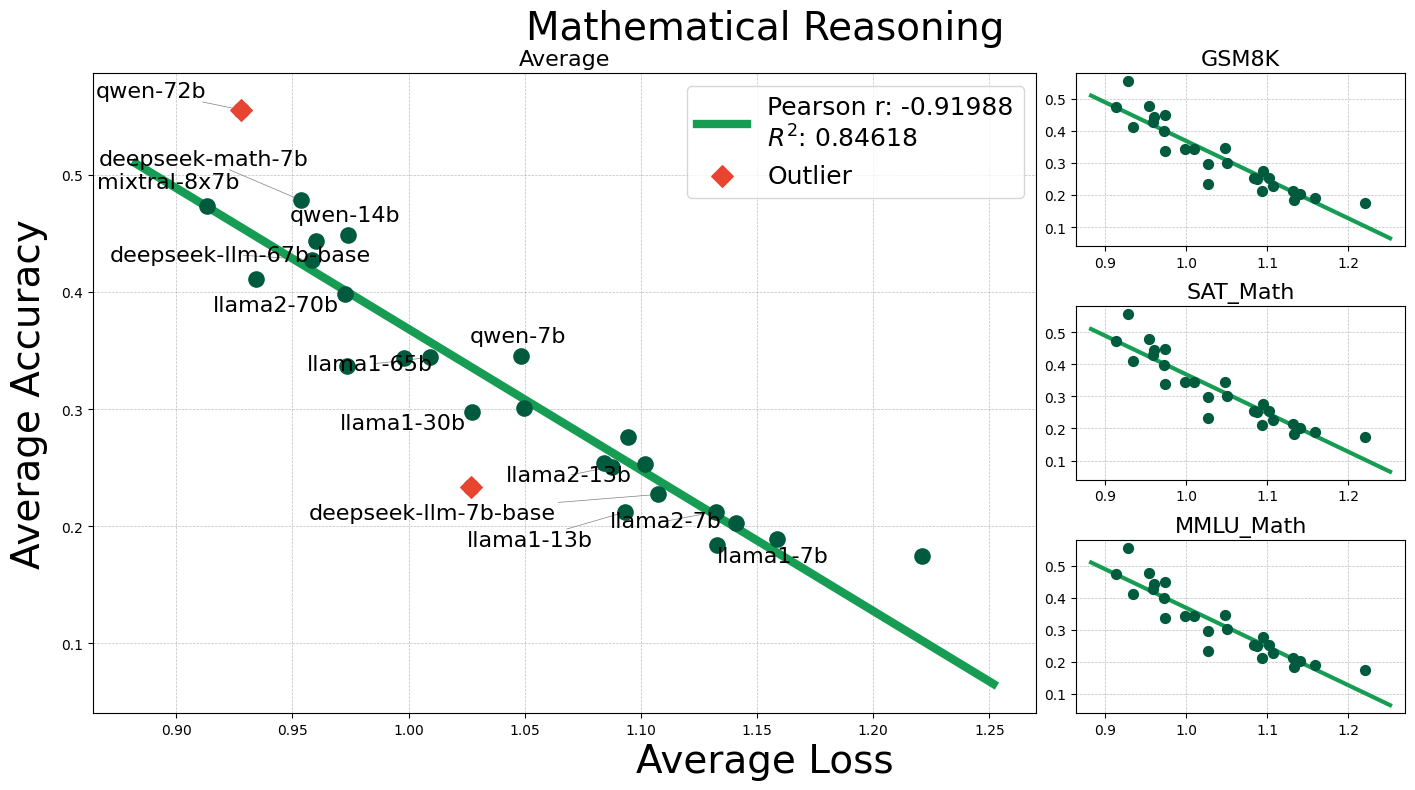

In [ ]:
model_map=["llama2", "deepseek", "qwen", "llama1", "mixtral"] #"mistral",
titles=["Average", "GSM8K", "SAT_Math", "MMLU_Math"]

draw_multiplot(models, x, y, titles=titles, outliers=outliers, model_map=model_map)

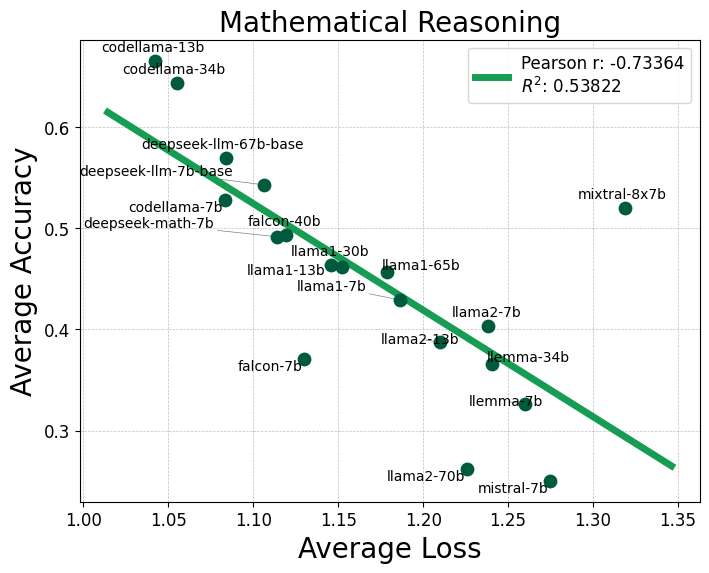

In [ ]:
data = pd.read_excel(file_path,sheet_name="MMLU-MATH")
x = data['x']
y = data['y']

draw_clean(models, x, y)

In [ ]:
def draw(sheet_name):
    alpha = 0.05
    # color, e_color=, '#F18625'
    # color, e_color='#359EFC', '#EC4A2A'
    # color, e_color='#359EFC', '#F26FA7'
    # color, e_color='#089F51', '#EC4A2A'
    # color, e_color='#43A7A5', '#DC9290'
    # color, e_color='#E84430', '#F1BC83'
    # color, e_color='#47936F', '#E68379'
    # color, e_color='#005A3E', '#F6CE00'
    color, e_color='#005A3E', '#E84430'
    # '#4285f4'
    
    # 读取上传的Excel文件
    file_path = 'Files/results.xlsx'
    data = pd.read_excel(file_path,sheet_name=sheet_name)

    # 提取 x 和 y 的值
    models = data['models']
    x = data['x']
    y = data['y']

    # 进行线性回归
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # 计算拟合直线的 y 值
    y_fit = slope * x + intercept

    residuals = y - y_fit  # 残差
    std_err_new = np.std(residuals,ddof=2)

    # 计算 Pearson Correlation coefficient
    pearson_coef, _ = stats.pearsonr(x, y)

    # R-Squared value (Coefficient of Determination)
    r_squared = r_value ** 2

    # 计算预测区间
    # 预测区间的公式是: y_pred +/- t * std_err * sqrt(1 + 1/n + (x - x_mean)^2 / ((n - 1) * x_std^2))
    # 其中 t 是 t 分布的临界值（对应于 95% 的置信水平）
    t = stats.t.ppf(1-alpha/2, len(x) - 2)  # 95% 置信区间的 t 值
    x_mean = np.mean(x)
    x_std = np.std(x, ddof=1)

    #pred_interval = t * std_err_new * np.sqrt(1 + 1/len(x) + (x - x_mean)**2 / ((len(x) - 1) * x_std**2))
    min_x = np.min(x)
    max_x = np.max(x)
    space = abs(min_x-max_x)*0.1

    x_line = np.linspace(min_x-space,max_x+space,100)
    y_line = slope * x_line + intercept
    pred_interval = t * std_err_new * np.sqrt(1 + 1/len(x) + (x_line - x_mean)**2 / ((len(x) - 1) * x_std**2))

    # 绘制数据点、拟合直线和预测区间
    plt.figure(figsize=(8,6))
    # Adding a grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=1,)  # Customize the grid's appearance here

    # plt.fill_between(x_line, y_line - pred_interval, y_line + pred_interval, color=color, alpha=0.1, label=f'{100-alpha*100}% Prediction Interval')
    plt.plot(x_line, y_line, color='#169D53', linewidth=5, alpha=1, label=f'Pearson r: {pearson_coef:.5f}\n$R^2$: {r_squared:.5f}', zorder=2, )#, label='Fit line: y = {:.2f}x + {:.2f}'.format(slope, intercept))
    # plt.plot(x_line, y_line, color='#5B8B7C', linewidth=5, alpha=1, label=f'Pearson r: {pearson_coef:.5f}\n$R^2$: {r_squared:.5f}', zorder=2, )#, label='Fit line: y = {:.2f}x + {:.2f}'.format(slope, intercept))
    plt.scatter(x, y, color=color, s=80, zorder=3,)# label='Data points', )

    texts = []
    for model, xi, yi in zip(models, x, y):
        texts.append(plt.text(xi, yi, model, ha='right', va='bottom'))

    # adjust_text(texts)  # Automatically adjust text to avoid overlap
    adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

    # Plot two isolated points in red
    isolated_x = [0.9278845876, 1.026949924]  # Example positions for isolated points
    isolated_y = [0.555386032, 0.2334542278]  # Adjust according to your dataset
    plt.scatter(isolated_x, isolated_y, color=e_color, s=80, marker='D', label='Outlier', zorder=4)

    plt.xlabel('Average Bits per character', fontsize=20)
    plt.ylabel('Average Accuracy', fontsize=20)
    plt.title('Mathematical Reasoning', fontsize=20)
    # Adjust the font size for the x and y-axis tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # plt.legend(fontsize=12, labels=[f'Data points', f'{100-alpha*100}% Prediction Interval', f'Pearson r: {pearson_coef:.5f}\n$R^2$: {r_squared:.5f}'])
    plt.legend(fontsize=12)#, labels=[f'Data points', f'{100-alpha*100}% Prediction Interval', f'Pearson r: {pearson_coef:.5f}\n$R^2$: {r_squared:.5f}'])
    plt.show()

In [ ]:
def draw_clean(models, x, y, outliers=None, model_map=None):
    color, e_color='#005A3E', '#E84430'

    # linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # compute Pearson Correlation coefficient
    pearson_coef, _ = stats.pearsonr(x, y)
    # R-Squared value (Coefficient of Determination)
    r_squared = r_value ** 2

    min_x = np.min(x)
    max_x = np.max(x)
    space = abs(min_x-max_x)*0.1

    x_line = np.linspace(min_x-space,max_x+space,100)
    y_line = slope * x_line + intercept

    plt.figure(figsize=(8,6))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=1,)  # Customize the grid's appearance here

    plt.plot(x_line, y_line, color='#169D53', linewidth=5, alpha=1, label=f'Pearson r: {pearson_coef:.5f}\n$R^2$: {r_squared:.5f}', zorder=2, )
    plt.scatter(x, y, color=color, s=80, zorder=3,)

    texts = []
    for model, xi, yi in zip(models, x, y):
        if model.split("-")[0] in model_map:
            texts.append(plt.text(xi, yi, model, ha='right', va='bottom'))

    # adjust_text(texts)  # Automatically adjust text to avoid overlap
    adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

    # Plot isolated points in red
    if outliers:
        isolated_x = outliers[0]
        isolated_y = outliers[1]
        plt.scatter(isolated_x, isolated_y, color=e_color, s=80, marker='D', label='Outlier', zorder=4)

    plt.xlabel('Average Bits per character', fontsize=20)
    plt.ylabel('Average Accuracy', fontsize=20)
    plt.title('Mathematical Reasoning', fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()